# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# working directory
import os

print(os.getcwd())

C:\Users\louiz\Git\CarND-Traffic-Sign-Classifier-Project


In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train_provided = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid_provided = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test_provided = pickle.load(f)

    
X_train, y_train = train_provided['features'], train_provided['labels']
X_valid, y_valid = valid_provided['features'], valid_provided['labels']
X_test, y_test = test_provided['features'], test_provided['labels']

print(f'X_train {len(X_train)} : y_train {len(y_train)}')
print(f'X_valid {len(X_valid)} : y_valid {len(y_valid)}')
print(f'X_test {len(X_test)} : y_test {len(y_test)}')

X_train 34799 : y_train 34799
X_valid 4410 : y_valid 4410
X_test 12630 : y_test 12630


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print(f'number of training samples {n_train}')
print(f'number of validation samples {n_validation}')
print(f'number of testing samples {n_test}')
print(f'image data shape {image_shape}')
print(f'number of classes {n_classes}')

number of training samples 34799
number of validation samples 4410
number of testing samples 12630
image data shape (32, 32, 3)
number of classes 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
# load label dictionary
import csv

def get_label_dictionary():
    with open('signnames.csv', mode='r') as infile:
        reader = csv.reader(infile)
        next(reader, None)
        labels = {int(rows[0]):rows[1] for rows in reader}
    return labels

# def get_label_dictionary2():
#     class_labels = {}
#     with open('signnames.csv', mode='r') as infile:
#         reader = csv.reader(infile)
#         class_labels = {key: val for key, val in reader}
#     return class_labels
    
label_dict = get_label_dictionary()
#label_dict2 = get_label_dictionary2()
print(f'size of label dictionary {len(label_dict)}')

print(label_dict)
#print(label_dict2)

size of label dictionary 43
{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight o

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
%matplotlib inline

import random
import pandas as pd

def display_signs(x_data, y_labels, sign_names, gray=False):
    #sign_names = traffic_sign['SignName'] 
    labels = np.unique(y_labels)
    print(labels)

    for label in labels:
        label_indices = np.where(y_labels==label)[0]
        fig = plt.figure(figsize=(10, 10))
        for i in range(10):
            rand_index = random.choice(label_indices)
            sub = fig.add_subplot(10, 10, i+1)
            if gray:
                sub.imshow(x_data[rand_index].reshape(32, 32), interpolation='nearest', cmap='gray')
            else:
                sub.imshow(x_data[rand_index].reshape(32, 32, 3), interpolation='nearest', cmap=None)
                
        plt.suptitle(str(label) + ': ' + sign_names[label])
        plt.show()

def display_signs_classes():
    fig = plt.figure(figsize=(16, 16))
    for i in range(n_classes):
        k = np.where(y_train==i)
        img = X_train[k[0][0]]
        ax = fig.add_subplot(int(n_classes/4)+1,4,i+1) 
        ax.imshow(img, interpolation='none')
        ax.set_title(label_dict[y_train[k[0][0]]])
    fig.tight_layout()
    plt.show()

# def display_hist_label_freq():
#     batch = pd.DataFrame()
#     batch['label'] = y_train
#     values = batch['label'].value_counts()
#     ax = values.plot(kind='barh', figsize = (12,12), title='Cars by sign type', color='navy')
#     ax.set_yticklabels(list(map(lambda i: label_dict[i], values.index.tolist())))            
#     for index, value in enumerate(values):
#         ax.text(value + 5, index - 0.15, str(value), color='green')

def draw_histogram(data):
    batch = pd.DataFrame()
    batch['label'] = data
    values = batch['label'].value_counts()
    ax = values.plot(kind='barh', figsize = (12,12), title='Cars by sign type', color='navy')
    ax.set_yticklabels(list(map(lambda i: label_dict[i], values.index.tolist())))            
    for index, value in enumerate(values):
        ax.text(value + 5, index - 0.15, str(value), color='green')
        
# def show_images(images, cols = 1, titles = None):
#     """Display a list of images in a single figure with matplotlib.
    
#     Parameters
#     ---------
#     images: List of np.arrays compatible with plt.imshow.
    
#     cols (Default = 1): Number of columns in figure (number of rows is 
#                         set to np.ceil(n_images/float(cols))).
    
#     titles: List of titles corresponding to each image. Must have
#             the same length as titles.
#     """
#     assert((titles is None)or (len(images) == len(titles)))
#     n_images = len(images)
#     if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
#     fig = plt.figure()
#     for n, (image, title) in enumerate(zip(images, titles)):
#         a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
#         if image.ndim == 2:
#             plt.gray()
#         plt.imshow(image)
#         a.set_title(title)
#     fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
#     plt.show()

#image_list = []
#for i in range(n_classes):
#    k = np.where(y_train==i)
#    image_list.append(X_train[k[0][0]])
#show_images(image_list, cols = 5, titles = None)

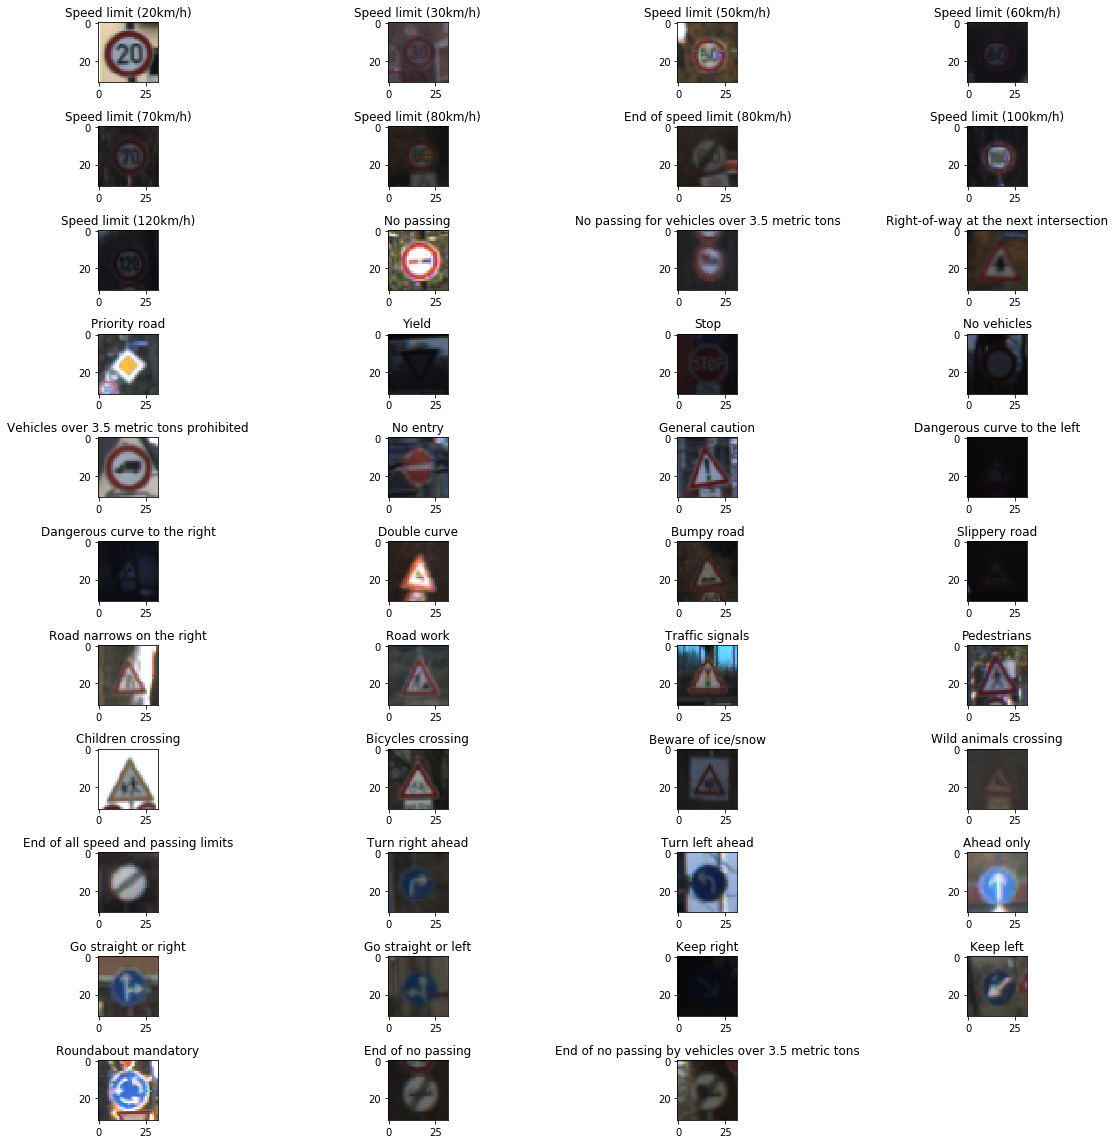

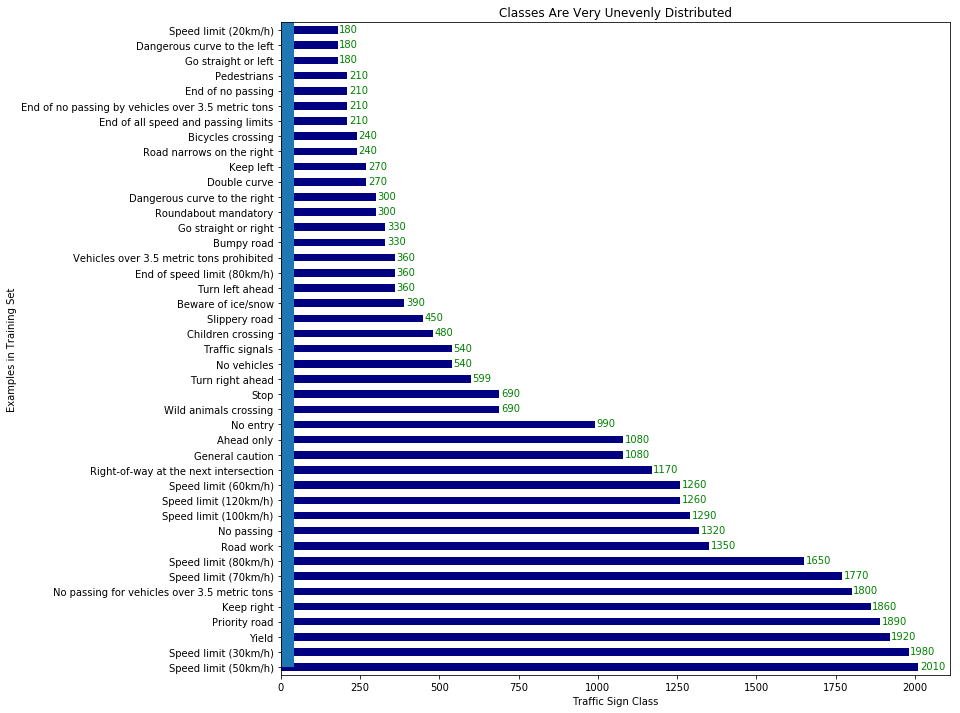

In [6]:
# visualise image data

# draw classes + sample image
display_signs_classes()

# histogram of label frequency
draw_histogram(y_train)

plt.hist(y_train, n_classes, histtype='bar')
plt.title("Classes Are Very Unevenly Distributed")
plt.xlabel("Traffic Sign Class")
plt.ylabel("Examples in Training Set")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [68]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from tqdm import tqdm
from skimage import exposure
from skimage import transform
import pickle
import cv2
import math
        
    
def convert_to_grayscale(images):
    batch = []
    for image in tqdm(images):
        #image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # this line was NOK... 
        R = image[:, :, 0]
        G = image[:, :, 1]
        B = image[:, :, 2]
        image = 0.299 * R + 0.587 * G + 0.114 * B
        image = (image / 255.).astype(np.float32)
        batch.append(image)
    g_images = np.reshape(batch , (-1, 32, 32, 1))    
    return g_images

# def normalized_image(images):
#     batch = []
#     #for image in tqdm(images):
#     for image in images:
#         batch.append(exposure.equalize_adapthist(image, clip_limit=0.03))
#     return np.array(batch)
def normalized_image(images):
    """
    1. Convert each image to grayscale and equalize histogram
    2. Normalize image values and set the mean to zero
    """
    out = np.empty(images.shape[:3], dtype=np.float32)
    for idx in range(out.shape[0]):
        out[idx] = cv2.equalizeHist(cv2.cvtColor(images[idx], cv2.COLOR_RGB2GRAY))
        out[idx] = cv2.normalize(out[idx], out[idx], alpha=-0.5, beta=0.5,
                                 norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return out.reshape(out.shape + (1,))


def augmentation_affine(X_data):
    # Ref https://github.com/neilslater/tabea_video_project/blob/master/tfi.py    
    batch = []
    for image in tqdm(X_data):
        # change aspect ratio of image 1:3 -> 11pixels    
        image_copy = image.copy()
        origin = (np.array(image.shape)-1) / 2.
        x_right = transform.SimilarityTransform(translation = [-origin, -origin] )
        x_left =  transform.SimilarityTransform(translation = [origin, origin] )
        
        random_zoom = np.random.random() * np.pi/6 - np.pi/12 
        # aspect ration 1:3 pixels
        random_x_tran = np.random.random() * image.shape[1] / 4 - image.shape[1] / 8  
        affine = transform.AffineTransform(scale = (random_zoom, random_zoom), rotation = 0)
        
        # choose bilnear default for now..
        image = transform.warp( image_copy( x_right + ( affine + x_left )).inverse, order=1, clip=False, preserve_range=True,
                     mode='reflect').astype(np.float32)
        batch.append(image)
    return X_data

In [8]:
# print("images after preprocessing - Normalisation and grayscale only....")
# print(np.mean(X_train))
# print(np.mean(X_test))

In [9]:
# Before we start we want the distribution of the samples of each class to be balanced.
import seaborn as sns
import collections


print(f'{os.getcwd()}\signnames.csv')
traffic_sign_names = pd.read_csv("./signnames.csv")

# create counter column
df = pd.DataFrame.from_dict(collections.Counter(y_train), orient='index').reset_index()
df = df.rename(columns={'index':'ClassId', 0:'count'})
traffic_sign_names['Num_images'] = df['count']

# ascending sign names
traffic_sign_names_asc = traffic_sign_names.sort_values(by=['Num_images'], ascending = True)
print(traffic_sign_names)
print()
print(traffic_sign_names_asc)

# y_train_data = pd.DataFrame()
# y_train_data['label'] = y_train
# values = y_train_data['label'].value_counts()
# ax = values.plot(kind='barh', figsize = (15,15), title='Histogram of Traffic Signs in Training dataset', color='pink')
# ax.set_yticklabels(list(map(lambda i: i, values.index.tolist())))            
# for index, value in enumerate(values):
#     ax.text(value + 5, index - 0.15, str(value), color='black')

C:\Users\louiz\Git\CarND-Traffic-Sign-Classifier-Project\signnames.csv
    ClassId                                           SignName  Num_images
0         0                               Speed limit (20km/h)         210
1         1                               Speed limit (30km/h)         690
2         2                               Speed limit (50km/h)         330
3         3                               Speed limit (60km/h)         540
4         4                               Speed limit (70km/h)         450
5         5                               Speed limit (80km/h)        1980
6         6                        End of speed limit (80km/h)         300
7         7                              Speed limit (100km/h)         330
8         8                              Speed limit (120km/h)         180
9         9                                         No passing         360
10       10       No passing for vehicles over 3.5 metric tons        1260
11       11              Righ

In [10]:
# Show the distribution of the Traffic Sign Class IDs from lowest to highest 
#ascending = traffic_sign_names.sort_values(by=['Num_images'], ascending = True)
#print(ascending)

In [11]:
print(traffic_sign_names_asc.shape)
print(type(traffic_sign_names_asc))

print(df["count"].mean())
print(df["count"].max())
print(df["count"].min())
print(df["count"].var())
print(df["count"].describe())

print("correlection matrix")
df.corr()

(43, 3)
<class 'pandas.core.frame.DataFrame'>
809.2790697674419
2010
180
392816.63455149514
count      43.000000
mean      809.279070
std       626.750855
min       180.000000
25%       285.000000
50%       540.000000
75%      1275.000000
max      2010.000000
Name: count, dtype: float64
correlection matrix


,ClassId,count
ClassId,1.000000,-0.553961
count,-0.553961,1.000000


In [12]:
print(df.head())
df["count"].kurt()

   ClassId  count
0       41    210
1       31    690
2       36    330
3       26    540
4       23    450


-1.002534064993975

In [13]:
def sizeOfExtendedSet(y_data, traffic_sign_csv_panda):
    
    tf = traffic_sign_csv_panda
    
    df = pd.DataFrame.from_dict(collections.Counter(y_data), orient='index').reset_index()
    df = df.rename(columns={'index':'ClassId', 0:'count'})
    tf['Num_images'] = df['count']
    sign_name_list = tf['SignName']

    #data = pd.DataFrame()
    #data['label'] = y_train
    tf["Num_New_Augmented_images"] = 0

    #for index, value in enumerate(df.itertuples(),1):
    images_for_balancing = []

    for index, value in enumerate(traffic_sign['Num_images']):    
        # Note that any Traffic sign dataset with sampleset < 90 %  max dataset range will be extended for re-balancing.
        balance_class_size = math.ceil(tf['Num_images'].quantile(0.9))
        iterations_required =  (balance_class_size - value)
        if (value < balance_class_size ):
            images_for_balancing.append(iterations_required)
            #print(index, "balancing required",  iterations_required)
        else:
            images_for_balancing.append(iterations_required)
            #print(index, "OK - don't balance",  iterations_required)

    tf["Num_New_Augmented_images"] = images_for_balancing

    return images_for_balancing

In [14]:
# generate stats on what needs to be extended
traffic_sign = pd.read_csv("./signnames.csv")
images_for_balancing = sizeOfExtendedSet(y_train ,traffic_sign )

# note index refers to the label.
print(f'Sammple size of the extended set {images_for_balancing}')


Sammple size of the extended set [1639, 1159, 1519, 1309, 1399, -131, 1549, 1519, 1669, 1489, 589, 1669, 79, 679, 1639, 1669, 1639, 1639, 1609, 1609, 529, 199, -11, 589, 49, 769, 1489, 769, 1489, -71, 559, 1459, 1579, 1579, 1549, 1250, 1369, -41, 1159, 1309, 859, -161, 499]


In [15]:
print(traffic_sign)

    ClassId                                           SignName  Num_images  \
0         0                               Speed limit (20km/h)         210   
1         1                               Speed limit (30km/h)         690   
2         2                               Speed limit (50km/h)         330   
3         3                               Speed limit (60km/h)         540   
4         4                               Speed limit (70km/h)         450   
5         5                               Speed limit (80km/h)        1980   
6         6                        End of speed limit (80km/h)         300   
7         7                              Speed limit (100km/h)         330   
8         8                              Speed limit (120km/h)         180   
9         9                                         No passing         360   
10       10       No passing for vehicles over 3.5 metric tons        1260   
11       11              Right-of-way at the next intersection  

In [82]:
sum(traffic_sign['Num_New_Augmented_images'])

44708

In [17]:
# print("X_train - size before extending set", len(X_train))
# print("y_train - size before extending set", len(y_train))
# print("X_valid - size before extending set", len(X_valid))
# print("X_test - size before extending set", len(X_test))
# print("y_valid - size before extending set", len(y_valid))
# print("y_test - size before extending set", len(y_test)) 

In [93]:
def extend_unbalanced(X_data, no_aug_images):
    
    batch_x_list = []
    batch_y_list = []
    #print(f'y_train {y_train}')    
        
    for label, value in enumerate(no_aug_images):
        #print(f'label: {label}, value: {value}')
        
        
        if(value >= 0):
            # create an extended batch for the class using augmentation_affine function or other. Note colour so 32x32x3 
            batch_x = np.empty([value, 32, 32, 3], dtype=np.uint8)
            batch_y = np.empty([value],  dtype=np.uint8)
       
            # select a random sample set from the class to augment
            label_index = np.where(y_train == label)[0]
            #print(label_index)
            #print(f'{label} {value} prior to append')
            while(value > 0):
                random_sample_index = random.choice(label_index)

                batch_x[value-1] = X_data[random_sample_index].astype(np.uint8)
                batch_y[value-1] = label
                # decrement until we have extended to the set to required number of images.
                value -=1
                # OK i'm doing this one at a time -> however currently augmentation_affine is def to just pass in batches
            #print(f'batch_x.shape {batch_x.shape}')
            #sub batch created.  Note still the original images here (not augmennted)
            batch_x_list.append(batch_x)
            batch_y_list.append(batch_y)
            
        #else:
            #print(f'label {label} {value} ')
    #finished creating completed batch_x_list for extention now apply augmentation
    
    #batch_x_list = augmentation_affine(batch_x_list[0])    
    #print(f'finished')
    return np.vstack(batch_x_list), np.hstack(batch_y_list)

In [94]:
#traffic_sign['Num_New_Augmented_images']
# for label, value in enumerate(traffic_sign['Num_New_Augmented_images']):
#     print(value)

In [95]:
# X_train & y_train extention
print(f'X_train & y_train extention')

print(f'X_train {len(X_train)}')
print(f'y_train {len(y_train)}')

X_train_augmented, y_train_augmented = extend_unbalanced(X_train, traffic_sign['Num_New_Augmented_images'])
X_train_extended = np.append(X_train, X_train_augmented, axis = 0)
y_train_extended = np.append(y_train, y_train_augmented, axis = 0)

#X_train_extended = X_train
#y_train_extended = y_train

# print(X_train_extended.shape)
# print(y_train_extended.shape)

print(f'X_train_extended {len(X_train_extended)}')
print(f'y_train_extended {len(y_train_extended)}')

X_train & y_train extention
X_train 34799
y_train 34799
X_train_extended 79922
y_train_extended 79922


In [20]:
#display_signs(X_train, y_train, traffic_sign['SignName'])
#display_signs(X_train_augmented, y_train_augmented, traffic_sign['SignName'], )

In [21]:
print('Normalizing/grayscale the extended Training Images...')
X_train_processed = normalized_image(X_train_extended)
y_train_processed = y_train_extended

print('Normalizing/grayscale the Validation Images...')
X_valid_processed = normalized_image(X_valid)
y_valid_processed = y_valid

print('Normalizing/grayscale the Test Images...')
X_test_processed = normalized_image(X_test)
y_test_processed = y_test

print("All Done normalising  images!")

Normalizing/grayscale the extended Training Images...
Normalizing/grayscale the Validation Images...
Normalizing/grayscale the Test Images...
All Done normalising  images!


In [22]:
#y_train_preprocessed = y_train_normalized
#print(f'y_train_preprocessed.shape {y_train_preprocessed.shape}')

In [23]:
#print(X_train_normalized.shape)
#print(y_train_normalized.shape)
#print(X_test_normalized.shape)

# print(f'Converting to Grayscale - Training Images...')
# X_train_grayscale = convert_to_grayscale(X_train_normalized)
# y_train_grayscale = y_train_normalized
# print(f'X_train_grayscale.shape {X_train_grayscale.shape}')

# print(f'Converting to Grayscale - Validation Images...')
# X_valid_grayscale = convert_to_grayscale(X_valid_normalized)
# y_valid_grayscale = y_valid_normalized
# print(f'X_valid_grayscale.shape {X_valid_grayscale.shape}')

# print(f'Converting to Grayscale - Training Images...')
# X_test_grayscale = convert_to_grayscale(X_test_normalized)
# y_test_grayscale = y_test_normalized
# print(f'X_test_grayscale.shape {X_test_grayscale.shape}')


# note that I initially was piping in th normalised images -> grayscale and would not actually be extending the training data!!!

#X_train_preprocessed = X_train_grayscale
#X_valid_preprocessed = X_valid_grayscale
#X_test_preprocessed = X_test_grayscale

#print(f'X_train_preprocessed.shape {X_train_preprocessed.shape}')
#print(f'y_train_preprocessed.shape {y_train_preprocessed.shape}')

#print(f'Preprocessing finished!')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


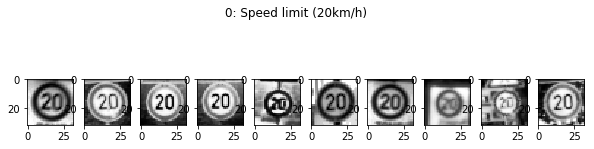

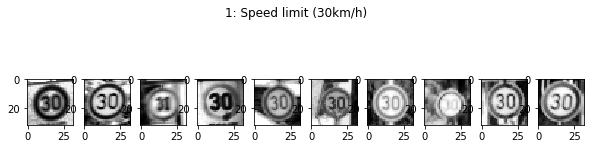

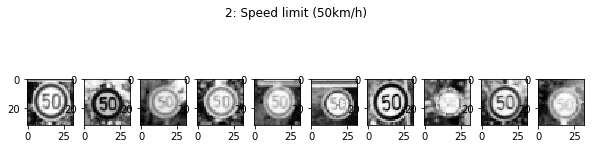

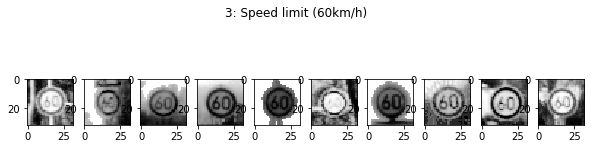

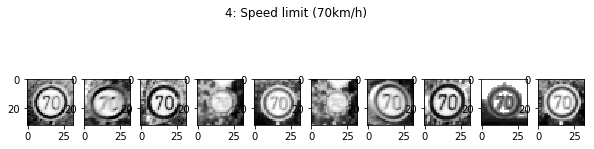

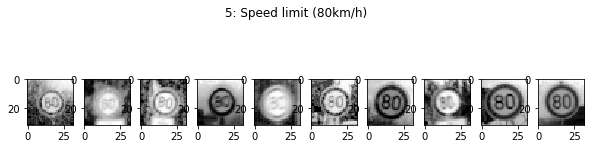

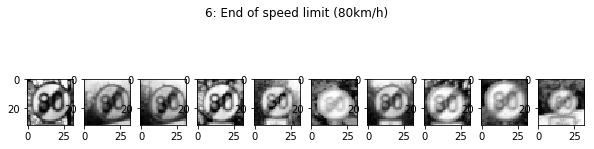

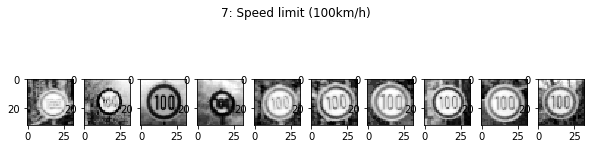

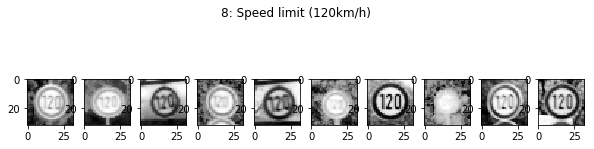

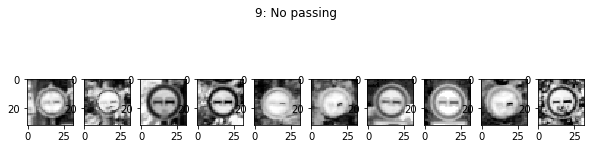

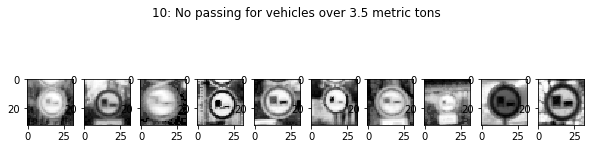

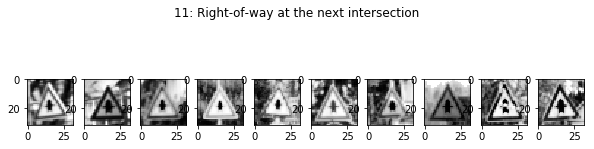

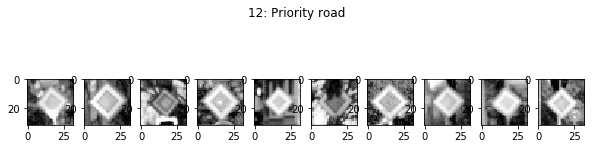

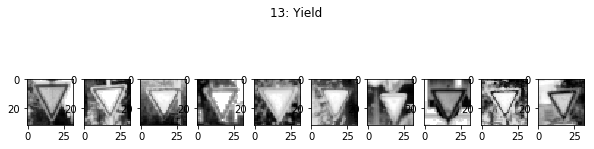

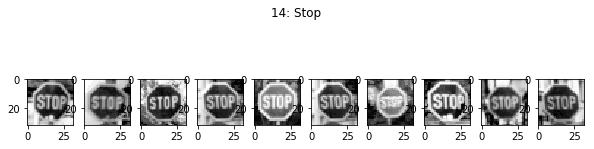

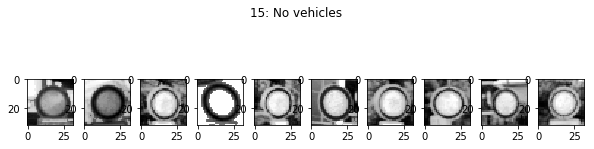

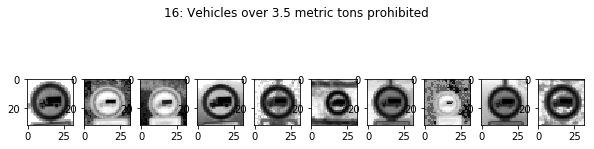

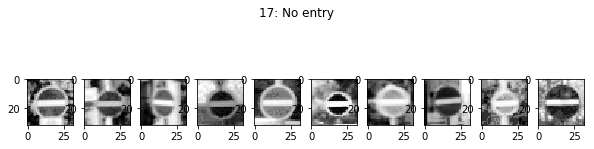

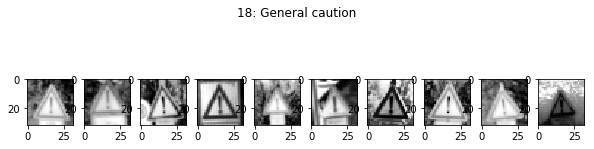

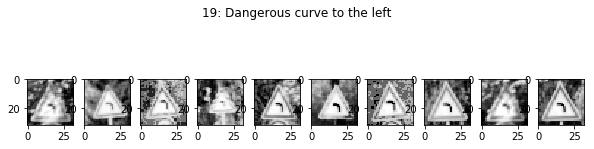

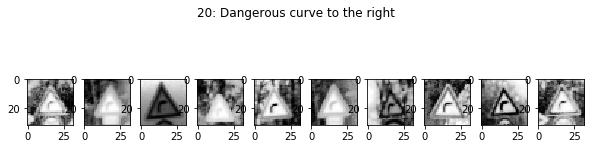

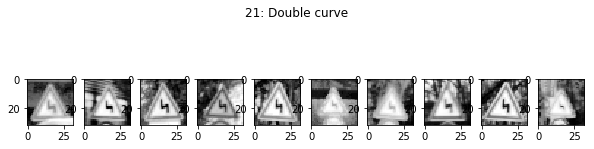

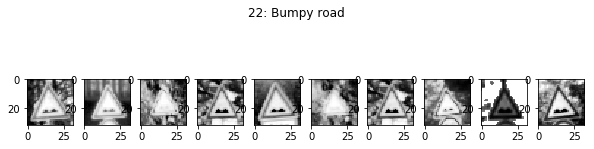

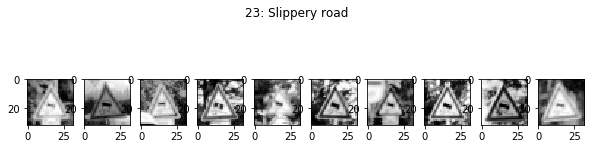

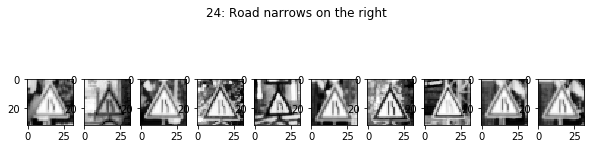

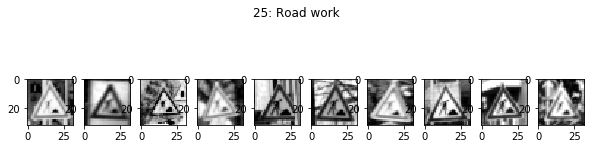

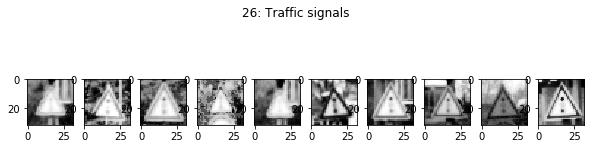

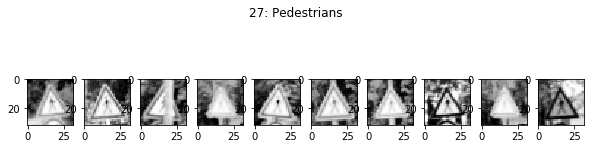

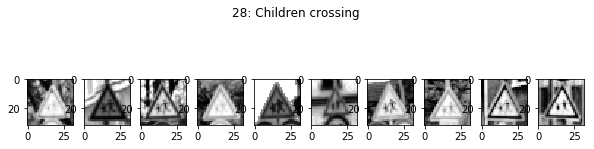

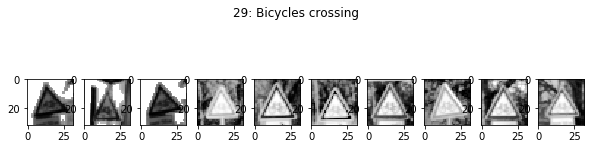

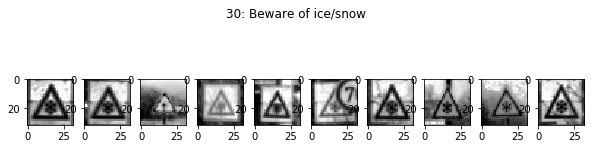

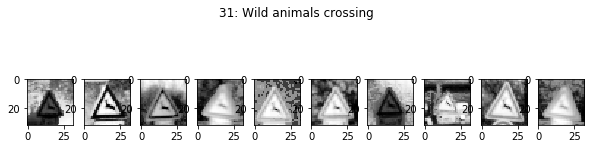

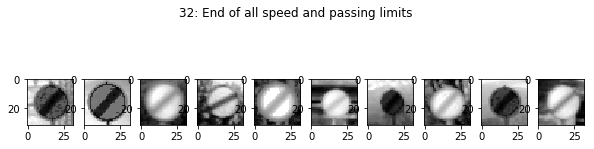

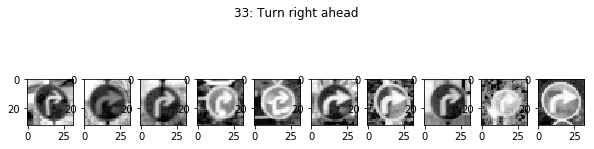

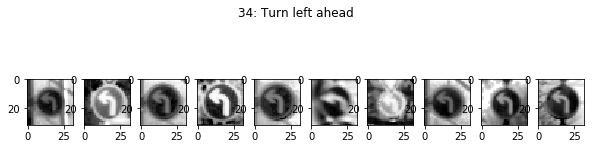

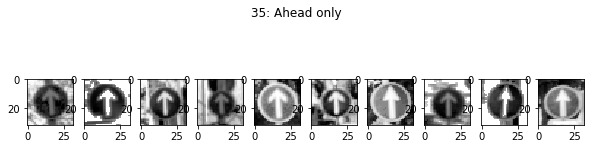

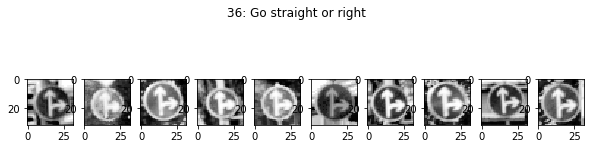

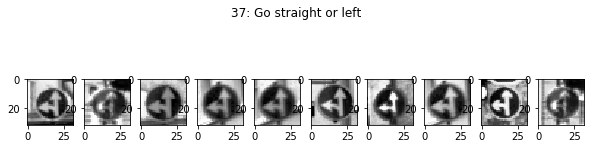

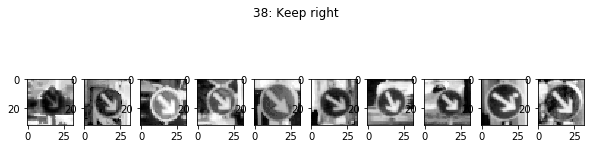

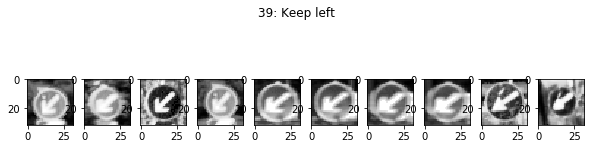

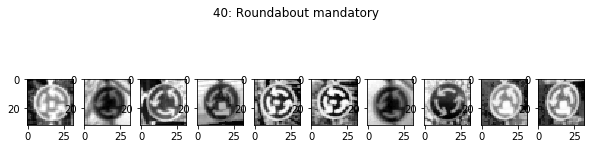

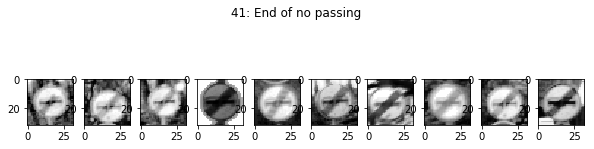

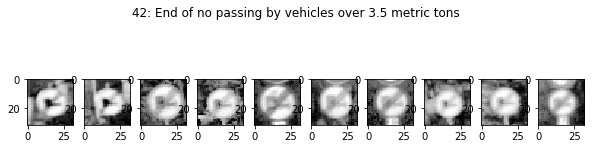

In [24]:
display_signs(X_train_processed, y_train_processed, traffic_sign['SignName'], gray=True)

In [25]:
from sklearn.model_selection import train_test_split

print(f'X_train_preprocessed.shape {X_train_processed.shape}')
print(f'y_train_preprocessed.shape {y_train_processed.shape}')

## Splitiing Training Data in Training, Validation, Test
X_train_split, X_train_valid_split, y_train_split, y_train_valid_split = train_test_split(
    X_train_processed,
    y_train_processed,
    test_size=0.30,
    random_state=34799
)
#print("X_train", len(X_train_extended))
#print("y_train", len(y_train_extended))
print("X_train_split", len(X_train_split))
print("X_valid", len(X_train_valid_split))
print("y_train_split", len(y_train_split))
print("y_valid", len(y_train_valid_split))

X_train_preprocessed.shape (79922, 32, 32, 1)
y_train_preprocessed.shape (79922,)
X_train_split 55945
X_valid 23977
y_train_split 55945
y_valid 23977


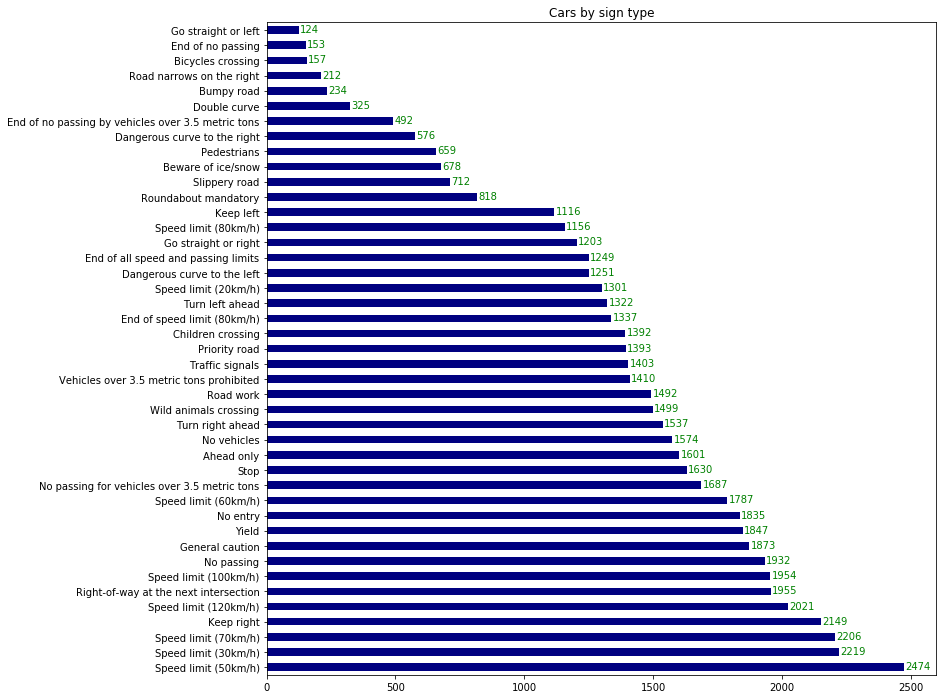

In [26]:
draw_histogram(y_train_split)

### Model Architecture

In [27]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128


from tensorflow.contrib.layers import flatten


# modified from LeNet Sermanet / LeCunn architecture
def LeNet_Louiza(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1:  Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') #+ conv1_b
    conv1_b = tf.nn.bias_add(conv1, conv1_b)

    # Activation - bias
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation - bias
    conv2 = tf.nn.relu(conv2)
    
    # Activation.
    #conv2 = tf.nn.dropout(tf.nn.relu(conv2), keep_prob=None)
    
    #  Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    # Dropout - Note without this drop out the covnet will not perform well!
    fc1 = tf.nn.dropout(fc1, keep_prob, name='fc1_dropout')

    # : Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # Dropout - this is to prevent overfitting...
    fc2 = tf.nn.dropout(fc2, keep_prob, name='fc2_dropout')

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits




(1) The first time I ran the Lenet -> result was 0.71 accuracy on the test data.

(2) Second time I added a drop out in teh 4th layer also and bumped up the epochs from 10 to 30... The keep_prob went from 0.619 to 0.7

Shuffle...
EPOCH 30 ...
Training Accuracy = 0.934
Validation Accuracy = 0.92

Test Accuracy = 0.862
Model Testing completed


trail 3
(3) est Accuracy = 0.834
 Model Testing completed
 
 Shuffle...
EPOCH 10 ...
Training Accuracy = 0.647
Validation Accuracy = 0.639


OK - it looks like i'lkl have to augment my data and pump up the datasets also...

(4) Im not actualy extending the data here....

Shuffle...
EPOCH 112 ...
Training Accuracy = 0.998
Validation Accuracy = 0.978

Shuffle...
EPOCH 113 ...
Training Accuracy = 0.999
Validation Accuracy = 0.977

Shuffle...
EPOCH 114 ...
Training Accuracy = 0.999
Validation Accuracy = 0.979

Shuffle...
EPOCH 115 ...
Training Accuracy = 0.998
Validation Accuracy = 0.977

Shuffle...
EPOCH 116 ...
Training Accuracy = 0.999
Validation Accuracy = 0.977

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [28]:
### Train your model here.
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tqdm import tqdm 

#Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

rate = 0.0015
logits = LeNet_Louiza(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [29]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,  keep_prob: 1.0})
        
        total_accuracy += (accuracy * len(batch_x))
        
    return total_accuracy / num_examples

### Model Training

In [30]:
## Training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_processed)
    
    print(f'Training...')
    print()
    for i in range(EPOCHS):
        #shuffle data
        print(f'Shuffle...')
        X_train_processed, y_train_processed = shuffle(X_train_processed, y_train_processed)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end], y_train_processed[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,  keep_prob: 0.7})
            
        #training_accuracy = evaluate(X_train_processed, y_train_processed)
        validation_accuracy = evaluate(X_valid_processed, y_valid_processed)
        print(f'EPOCH {i+1} ...')
        #print(f'Training Accuracy = {training_accuracy:.3f}')
        print(f'Validation Accuracy = {validation_accuracy:.3f}')
        print()
        
        
    saver.save(sess, './lenet')
    print(f'Model saved')
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

Training...

Shuffle...
EPOCH 1 ...
Validation Accuracy = 0.869

Shuffle...
EPOCH 2 ...
Validation Accuracy = 0.919

Shuffle...
EPOCH 3 ...
Validation Accuracy = 0.938

Shuffle...
EPOCH 4 ...
Validation Accuracy = 0.944

Shuffle...
EPOCH 5 ...
Validation Accuracy = 0.950

Shuffle...
EPOCH 6 ...
Validation Accuracy = 0.949

Shuffle...
EPOCH 7 ...
Validation Accuracy = 0.948

Shuffle...
EPOCH 8 ...
Validation Accuracy = 0.949

Shuffle...
EPOCH 9 ...
Validation Accuracy = 0.957

Shuffle...
EPOCH 10 ...
Validation Accuracy = 0.959

Shuffle...
EPOCH 11 ...
Validation Accuracy = 0.964

Shuffle...
EPOCH 12 ...
Validation Accuracy = 0.961

Shuffle...
EPOCH 13 ...
Validation Accuracy = 0.962

Shuffle...
EPOCH 14 ...
Validation Accuracy = 0.964

Shuffle...
EPOCH 15 ...
Validation Accuracy = 0.961

Shuffle...
EPOCH 16 ...
Validation Accuracy = 0.964

Shuffle...
EPOCH 17 ...
Validation Accuracy = 0.967

Shuffle...
EPOCH 18 ...
Validation Accuracy = 0.960

Shuffle...
EPOCH 19 ...
Validation Accurac

In [31]:
##  Testing Here

#X_train = X_train_preprocessed
#y_train = y_train_preprocessed

#x_valid= X_valid_preprocessed

#print(X_train_preprocessed.shape)
#print(y_train_preprocessed.shape)
#print(x_valid.shape)
#print(y_valid.shape)

### Model Testing

In [32]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #saver2 = tf.train.import_meta_graph('lenet.meta')
    tf.train.Saver().restore(sess, "./lenet")
    #saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test_processed, y_test_processed)
    print(f'Test Set Accuracy = {test_accuracy:.3f}')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 0.939




Shuffle...
EPOCH 124 ...
Training Accuracy = 0.999
Validation Accuracy = 0.994

Shuffle...
EPOCH 125 ...
Training Accuracy = 0.999
Validation Accuracy = 0.993

Model saved

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 0.920

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [33]:
# import csv
# class_labels = {}
# with open('signnames.csv', mode='r') as infile:
#     reader = csv.reader(infile)
#     class_labels = {key: val for key, val in reader}

In [34]:
import glob

y_test_processed = np.array([26,14, 33, 1,3,5,7,8,29,18,19,10])
n_signs = len(y_test_processed)
           
def load_new_traffic_signs(image_files):
    "read new images from set directory and output as array, along with label data"    
    images = np.empty((n_signs,32,32,3), dtype=np.uint8)
    for i, name in enumerate(image_files):
        images[i] = cv2.resize(cv2.imread(name), (32, 32))
        images[i] = cv2.cvtColor(images[i], cv2.IMREAD_COLOR, cv2.COLOR_BGR2RGB)
        #img = cv2.resize(img, (32, 32))
        #images.append(img)
    
    #images = np.reshape(images, (-1, 32, 32, 3))    
    return images

image_files = glob.glob('new_traffic_sign_images/*.jpg')
X_test_custom = load_new_traffic_signs(image_files)

X_test_processed = normalized_image(X_test_custom)


#X_test_custom = convert_to_grayscale(X_test_custom)
print(image_files)
print(len(X_test_processed))
print(y_test_processed)

['new_traffic_sign_images\\10_label26.jpg', 'new_traffic_sign_images\\11_label14.jpg', 'new_traffic_sign_images\\12_label33_.jpg', 'new_traffic_sign_images\\1_30_label1.jpg', 'new_traffic_sign_images\\2_60_label3.jpg', 'new_traffic_sign_images\\3_80_label_5.jpg', 'new_traffic_sign_images\\4_100_label7.jpg', 'new_traffic_sign_images\\5_120_label8.jpg', 'new_traffic_sign_images\\6_bike_cross_label29.jpg', 'new_traffic_sign_images\\7_label18.jpg', 'new_traffic_sign_images\\8_label9.jpg', 'new_traffic_sign_images\\9_label0_.jpg']
12
[26 14 33  1  3  5  7  8 29 18 19 10]


In [35]:

#print(image_list)
#print(X_new_data[0].shape)

# fig, axs = plt.subplots(3,2, figsize=(10, 10))
# fig.subplots_adjust(hspace = .01, wspace=.000)
# axs = axs.ravel()
# plt.tight_layout()

# print(len(image_list))
# for i in range(0,5): 
#     #print(file_name)
#     axs[i].imshow(X_new_data[i])
#     axs[i].set_title(image_list[i])
#     axs[i+1].imshow(X_new_data[i+1])
#     axs[i+1].set_title(image_list[i+1])


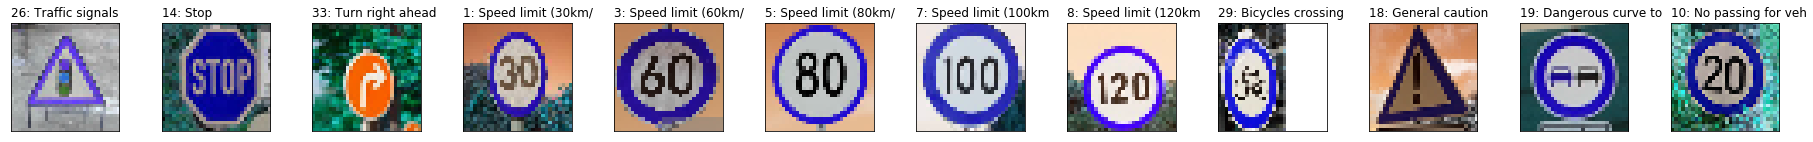

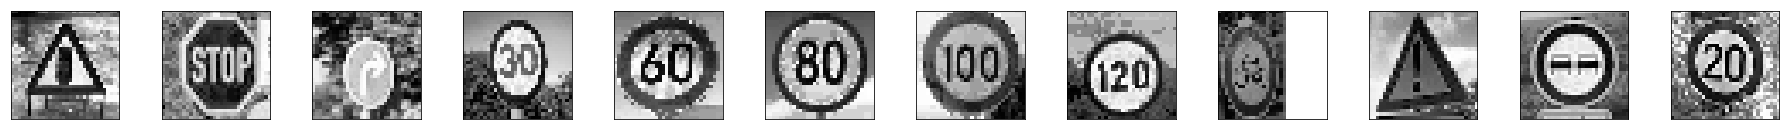

In [36]:
def visualize_class(X_data, y_labels=[], cmap=None,
                    rows=1, cols=12, maxtitlelen=18, figsize=(15,1)):
    """
    Convenience method to visualize sets of images. If a set of corresponding
    class labels is passed, they will be printed along with the image.
    """
    has_labels = len(y_labels) > 0
    assert not has_labels or len(X_data) == len(y_labels)

    plt.figure(figsize=figsize)
    for i, img in enumerate(X_data):
        plt.subplot(rows, cols, i+1, xticks=[], yticks=[])
        plt.imshow(img, interpolation="nearest", cmap=cmap)
        if has_labels:
            y_val = y_labels[i]
            #y_label = class_labels[str(y_val)][:maxtitlelen]
            y_label = label_dict[y_val][:maxtitlelen]
            plt.title("{}: {}".format(y_val, y_label), loc="left")
    plt.show()
    
def grayplot(data):
    X_new_data = data
    fig, axs = plt.subplots(3,2, figsize=(10, 10))
    fig.subplots_adjust(hspace = .01, wspace=.000)
    axs = axs.ravel()
    plt.tight_layout()

    for i in range(5): 
        #print(file_name)
        axs[i].imshow(X_new_data[i].reshape(32,32) ,cmap = 'gray')
        axs[i].set_title(image_files[i])
        axs[i+1].imshow(X_new_data[i+1].reshape(32,32), cmap = 'gray')
        axs[i+1].set_title(image_files[i+1])
        
#grayplot(X_test_custom)
#print(X_test_custom.shape)
visualize_class(X_test_custom, y_test_processed, maxtitlelen=18, figsize=(32, 2))
visualize_class(X_test_processed.reshape(X_test_processed.shape[:3]), figsize=(32, 2), cmap="gray")

### Predict the Sign Type for Each Image

In [37]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Normalise and grayscale preprocessing..
#X_new_data_normalised = normalized_image(X_new_data)
#X_new_data_preprocessed = convert_to_grayscale(X_new_data_normalised)


In [38]:
#label_dict = None
#with open('signnames.csv', mode='r') as infile:
#    reader = csv.reader(infile)
#    next(reader, None)
#    label_dict = {int(rows[0]):rows[1] for rows in reader}

#print("creating label_dict ...")
#print(label_dict)

#with open('signnames.csv', 'r') as f:
#    reader = csv.reader(f)
#    next(reader, None)
#    sign_names = list(reader)
    
#def get_label_dictionary():
#    with open('signnames.csv', mode='r') as infile:
#        reader = csv.reader(infile)
#        next(reader, None)
#        labels = {int(rows[0]):rows[1] for rows in reader}
#    return labels
#print(sign_names)
# manual classification here.



# Anthony see below -> i must evalaute basde on softmax probabilties 

In [39]:
### Softmax+topk prediction on custom images

def custom_evaluate(x_data, y_data, s_names):
    s_max_l = tf.nn.softmax(logits)
    s_top_k = tf.nn.top_k(s_max_l, k=5)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        load = tf.train.import_meta_graph('./lenet.meta')
        load.restore(sess, "./lenet")
        s_score = sess.run(s_max_l, feed_dict={x: x_data, keep_prob: 1.0})
        s_top_k = sess.run(s_top_k, feed_dict={x: x_data, keep_prob: 1.0})

        for i, image in enumerate(x_data):
            print(f'sample no. {i} : ({y_data[i]}){s_names[y_data[i]]}')
            print(f'- pr1 {s_top_k[0][i][0]:.2%} : ({s_top_k[1][i][0]}){s_names[s_top_k[1][i][0]]}')
            print(f'- pr2 {s_top_k[0][i][1]:.2%} : ({s_top_k[1][i][1]}){s_names[s_top_k[1][i][1]]}')
            print(f'- pr3 {s_top_k[0][i][2]:.2%} : ({s_top_k[1][i][2]}){s_names[s_top_k[1][i][2]]}')
            print(f'- pr3 {s_top_k[0][i][3]:.2%} : ({s_top_k[1][i][3]}){s_names[s_top_k[1][i][3]]}')
            print(f'- pr3 {s_top_k[0][i][4]:.2%} : ({s_top_k[1][i][4]}){s_names[s_top_k[1][i][4]]}')
            print()
    return s_top_k
    
#s_top_k = custom_evaluate(X_test_processed, y_test_processed, sign_names)

#print(y_pred)

n_preds = 5
prediction_operation = tf.nn.top_k(tf.nn.softmax(logits), n_preds)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    probs, pred_classes = sess.run(prediction_operation, feed_dict={x: X_test_processed, keep_prob: 1.})



INFO:tensorflow:Restoring parameters from ./lenet


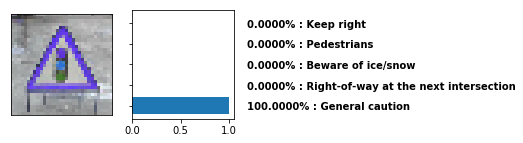

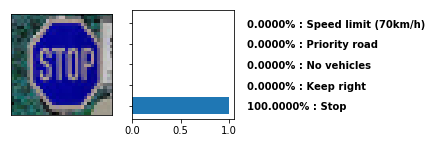

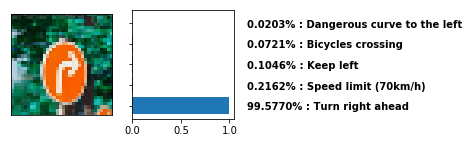

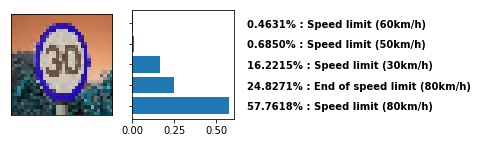

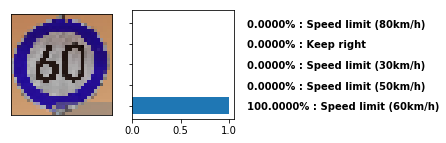

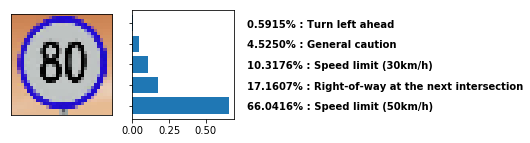

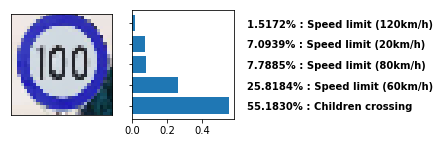

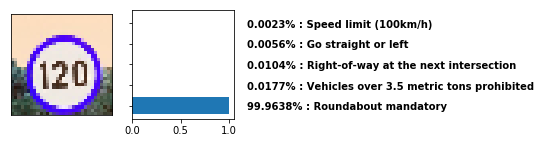

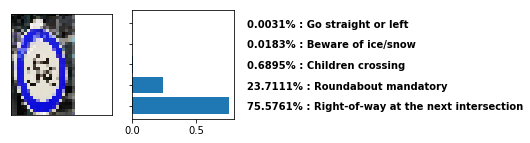

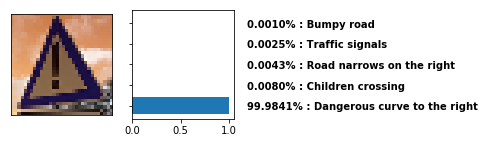

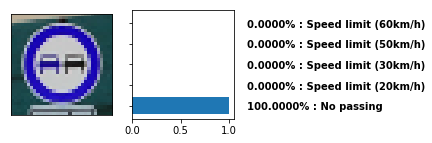

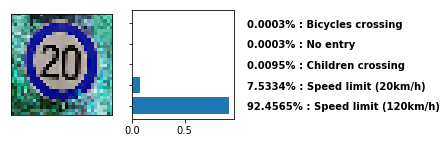

In [40]:
def prediction_confidence(img, likelihoods, predictions):
    labels = ["{:.4f}% : {}".format(likelihoods[i]*100, label_dict[c])
              for i, c in enumerate(predictions)]
    y_pos = np.arange(len(labels))

    plt.figure(figsize=(4,2))
    plt.subplot(121, xticks=[], yticks=[])
    plt.imshow(img)
    plt.subplot(122)
    plt.barh(y_pos, likelihoods)
    plt.yticks(y_pos, labels, position=(1.2,1), ha="left", weight="semibold")
    plt.show()

for idx in range(n_signs):
    prediction_confidence(X_test_custom[idx], probs[idx], pred_classes[idx])

In [41]:
# with tf.Session() as sess:
#     loader = tf.train.import_meta_graph('./lenet.meta')
#     loader.restore(sess, t  f.train.latest_checkpoint('./'))
#     sess = tf.get_default_session()
#     scores = sess.run(logits, feed_dict={x: X_new_data, keep_prob: 1.0})
#     predictions = sess.run(correct_prediction, feed_dict={x: X_new_data, y: y_new_data, keep_prob: 1.0})
#     top_scores = np.argmax(scores, 1)

#     print("New Classification - Prediction results): ")
#     for i in range(len(y_new_data)):
#         print(f'Correct label:  {sign_names[y_new_data[i]][1]} - {str(y_new_data[i])}')
#         print(f'Prediced label: {sign_names[top_scores[i]][1]} - {str(top_scores[i])}')
#         print(f'Result: {str(predictions[i])}')
#         print()
        
        

# this one has been run OK ANtrhony but i need to get it comparioson with the softamx probabilities 

### Analyze Performance

In [42]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    tf.train.Saver().restore(sess, "./lenet")
    new_img_accuracy = evaluate(X_test_processed, y_test_processed)
    print("New Image Accuracy = {:.3f}".format(new_img_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
New Image Accuracy = 0.250


In [43]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 
### signs correctly, it's 20% accurate on these new images.
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    cm = [row/sum(row) for row in cm]
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.Oranges)
    fig.colorbar(cax)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class IDs')
    plt.ylabel('True Class IDs')
    plt.show()
    
    

In [44]:
#print(y_new_data.shape)    
#print(y_pred.shape)
# tmp = []
# y_pred = s_top_k[1]
# for i, v in enumerate(y_pred):
#     tmp.append(y_pred[i][0])
# y_new_data = np.array(y_new_data)
# tmp = np.array(tmp)
# print(y_new_data)
# print(tmp)

# ## Finding classes which where incorrectly predicted
# classes = [i for i in range(n_classes)]
# plt.figure(figsize=(10,10), facecolor='green', edgecolor='grey', linewidth=0.1)
# cm = confusion_matrix(y_new_data, tmp)
# plot_confusion_matrix(cm)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [45]:
s_top_k = custom_evaluate(X_test_processed, y_test_processed, label_dict)

INFO:tensorflow:Restoring parameters from ./lenet
sample no. 0 : (26)Traffic signals
- pr1 100.00% : (18)General caution
- pr2 0.00% : (11)Right-of-way at the next intersection
- pr3 0.00% : (30)Beware of ice/snow
- pr3 0.00% : (27)Pedestrians
- pr3 0.00% : (38)Keep right

sample no. 1 : (14)Stop
- pr1 100.00% : (14)Stop
- pr2 0.00% : (38)Keep right
- pr3 0.00% : (15)No vehicles
- pr3 0.00% : (12)Priority road
- pr3 0.00% : (4)Speed limit (70km/h)

sample no. 2 : (33)Turn right ahead
- pr1 99.58% : (33)Turn right ahead
- pr2 0.22% : (4)Speed limit (70km/h)
- pr3 0.10% : (39)Keep left
- pr3 0.07% : (29)Bicycles crossing
- pr3 0.02% : (19)Dangerous curve to the left

sample no. 3 : (1)Speed limit (30km/h)
- pr1 57.76% : (5)Speed limit (80km/h)
- pr2 24.83% : (6)End of speed limit (80km/h)
- pr3 16.22% : (1)Speed limit (30km/h)
- pr3 0.69% : (2)Speed limit (50km/h)
- pr3 0.46% : (3)Speed limit (60km/h)

sample no. 4 : (3)Speed limit (60km/h)
- pr1 100.00% : (3)Speed limit (60km/h)
- pr2 0

In [ ]:
# def y_predict_model(Input_data, top_k=5):
#     """
#     Generates the predictions of the model over the input data, and outputs the top softmax probabilities.
#     Parameters:
#         X_data: Input data.
#         top_k (Default = 5): The number of top softmax probabilities to be generated.
#     """
#     num_examples = len(Input_data)
#     y_pred = np.zeros((num_examples, top_k), dtype=np.int32)
#     y_prob = np.zeros((num_examples, top_k))
#     with tf.Session() as sess:
#         loader = tf.train.import_meta_graph('./lenet.meta')
#         loader.restore(sess, tf.train.latest_checkpoint('./'))
#         sess = tf.get_default_session()
#         #LeNet_Model_norm.saver.restore(sess, os.path.join('Saved_Models', "LeNet_normalized"))
#         y_prob, y_pred = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=top_k), 
#                              feed_dict={x:Input_data, keep_prob:1})
#     return y_prob, y_pred

# y_prob, y_pred = y_predict_model(X_new_data)

In [ ]:
# test_accuracy = 0
# for i in range(len(X_new_data)):
#     accu = y_new_data[i] == np.asarray(y_pred[i])[0]
#     if accu == True:
#         test_accuracy += 0.1
# print("New Images Test Accuracy = {:.1f}%".format(test_accuracy*100))

# plt.figure(figsize=(20, 30))
# for i in range(len(X_new_data)):
#     plt.subplot(len(X_new_data), 2, 2*i+1)
# #     print(images[i].shape)
#     plt.imshow(images[i]) 
#     plt.title('Actual: ' + get_name_from_label(y_new_data[i]) + ' | Predicted: ' + get_name_from_label(y_pred[i][0]))
#     plt.axis('off')
#     plt.subplot(len(X_test_new), 2, 2*i+2)
#     plt.barh(np.arange(1, 6, 1), y_prob[i, :])
#     labels = [get_name_from_label(j) for j in y_pred[i]]
#     plt.yticks(np.arange(1, 6, 1), labels)
# plt.show()

In [ ]:
#http://localhost:8889/notebooks/Udacity/PROJECT_%20Traffic%20Sign%20Classifier/Reference_projects/German-Traffic-Sign-Recognition-master/German_Traffic_Sign_Classifier.ipynb

# test_accuracy = 0
# for i in range(len(X_new_data)):
#     accu = y_new_data[i] == np.asarray(y_pred[i])[0]
#     if accu == True:
#         test_accuracy += 0.1
# print("New Images Test Accuracy = {:.1f}%".format(test_accuracy*100))

# plt.figure(figsize=(20, 30))
# for i in range(len(X_test_new)):
#     plt.subplot(len(X_test_new), 2, 2*i+1)
# #     print(images[i].shape)
#     plt.imshow(images[i]) 
#     plt.title('Actual: ' + get_name_from_label(y_new_data[i]) + ' | Predicted: ' + get_name_from_label(y_pred[i][0]))
#     plt.axis('off')
#     plt.subplot(len(X_new_data), 2, 2*i+2)
#     plt.barh(np.arange(1, 6, 1), y_prob[i, :])
#     labels = [get_name_from_label(j) for j in y_pred[i]]
#     plt.yticks(np.arange(1, 6, 1), labels)
# plt.show()

In [ ]:
# class_11 = np.where(y_test==11)
# y_class_11_pred = y_pred[class_11]
# X_class_11_samples = X_test_normalized[class_11]

# class_11_predicted_as_class_30 = np.where(y_class_11_pred==30)
# X_class_11_samples_predicted_as_class_30 = X_class_11_samples[class_11_predicted_as_class_30]

# print("Finding top-5 classes for incorrect predictions...")
# y_top_5 = None
# with tf.Session() as sess:
#     loader = tf.train.import_meta_graph('./lenet.meta')
#     loader.restore(sess, tf.train.latest_checkpoint('./'))
#     sess = tf.get_default_session()
    
#     for X_incorrect in X_class_11_samples_predicted_as_class_30:
#         y_top_5 = sess.run(tf.nn.top_k(logits, k=3), feed_dict={x:[X_incorrect], keep_prob:1.0})
#         print(y_top_5.indices)

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

## This code calculates and missclassification error for each sign and
## show maxximum misclassiffied sign for this particular one
# for i in range(n_classes):
#     cm = confusion_matrix(y_test, y_pred)
#     cm_t = np.transpose(cm)
#     total_true_count = np.sum(y_test==i)
#     total_true_pred = cm[i][i]
#     precision = total_true_pred / np.sum(cm_t[i].ravel())
#     cm[i][i] = 0
#     max_misclas_as = np.argmax(cm[i])
#     percent_clas_max_confusion = cm[i][max_misclas_as] / total_true_count * 100
    
#     print("Class %s:" % label_dict[i])
#     print("  Accuracy = {:.2f}%".format(total_true_pred/total_true_count*100))
#     print("  Precision = {:.2f}%".format(precision*100))
    
#     if (cm[i][max_misclas_as] != 0):
#         print("  Maximum Misclassified as: %s" % label_dict[max_misclas_as])
#         print("  Misclassification Percentage for class above: {:.2f}%".format(percent_clas_max_confusion))
    
#     print()

In [ ]:
# for i in range(len(X_test_custom)):
#     top5_classes = np.array(sign_names.SignName[top5[i, :]])
#     top5_probs = np.array(test_new_pred[i, top5[i, :]])

#     implot = plt.figure(figsize=(10,4))

#     ax = implot.add_subplot(1,2,1)
#     ax.grid(False)
#     ax.axis('off')
#     ax.imshow(new_img[i])

#     #classes = test_names
#     #probs = test_probs
#     y_pos = np.arange(len(top5_classes))

#     ax2 = implot.add_subplot(1,2,2)
#     ax2.barh(y_pos, top5_probs, align='center')
#     ax2.set_yticks(y_pos)
#     ax2.set_yticklabels(top5_classes)
#     ax2.yaxis.set_ticks_position('right')
#     ax2.set_xlabel('Top 5 Probabilities')
#     ax2.set_title('Classes')
#     ax2.set_xlim([0, 1])
    
#     plt.tight_layout()

#     plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")